<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_07/Text_Representation_and_Embedding_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 표현 기법과 임베딩
# **Data Representation**

## <font color='orange'>**4. Text data**
- **아래 그림을 이해하여야 한다.**
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-embeddings.png'>


#### 2.5 Word Embedding
- 의미 기반 분산 표현 (Distributed Representation)
- Word2Vec, GloVe, FastText 등
- 단어 간 유사도, 의미 추론 가능
- CBOW / Skip-gram
- https://word2vec.kr/search

In [1]:
!pip install gensim --quiet

### **[Gensim](https://radimrehurek.com/gensim/)**

In [5]:
import nltk

# NLTK 데이터 다운로드
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec

In [7]:
from nltk.corpus import gutenberg
# 필요한 리소스를 다운로드
nltk.download('gutenberg')
# 구텐베르크 말뭉치에서 사용 가능한 파일 목록 출력
file_ids = gutenberg.fileids()
file_ids

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
# 1. 텍스트 로드
raw_text = gutenberg.raw('bible-kjv.txt')
raw_text[:100]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called '

In [9]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
raw_text[:100]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called '

In [11]:
# 2. 문장 단위로 분리 후, 각 문장을 단어 단위로 토큰화
sentences = sent_tokenize(raw_text[:1000])  # 문장 단위 분리
sentences[0]

'[The King James Bible]\n\nThe Old Testament of the King James Bible\n\nThe First Book of Moses:  Called Genesis\n\n\n1:1 In the beginning God created the heaven and the earth.'

In [12]:
# prompt: raw_text에 불용어, 특수문자, 줄바꿈, 번호 등을 모두 제거하는 전처리 코드, 단 마침표는 제거하지마라

import re

def preprocess_text(text):
  # 특수문자 제거 (마침표 제외)
  text = re.sub(r"[^a-zA-Z0-9\. ]", "", text)

  # 줄바꿈 제거
  text = text.replace('\n', ' ')

  # 번호 제거
  text = re.sub(r'\d+', '', text)

  # 불용어 제거
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  words = [word for word in words if word.lower() not in stop_words]

  # 공백 제거 및 단어 합치기
  text = " ".join(words)

  return text

# 전처리 적용
processed_text = preprocess_text(raw_text)
print(processed_text[:100])


King James BibleThe Old Testament King James BibleThe First Book Moses Called Genesis beginning God 


In [14]:
sentences = sent_tokenize(preprocess_text(raw_text))  # 문장 단위 분리

(list, 25886)

In [17]:
for i in range(10):
    print(sentences[i])

King James BibleThe Old Testament King James BibleThe First Book Moses Called Genesis beginning God created heaven earth .
earth without form void darkness uponthe face deep .
Spirit God moved upon face thewaters .
God said Let light light .
God saw light good God divided lightfrom darkness .
God called light Day darkness called Night.And evening morning first day .
God said Let firmament midst watersand let divide waters waters .
God made firmament divided waters wereunder firmament waters firmamentand .
God called firmament Heaven .
evening themorning second day .


In [19]:
tokenized_sentences = [word_tokenize(sent.lower()) for sent in sentences]  # 단어 단위 토큰화 + 소문자

type(tokenized_sentences), len(tokenized_sentences)

(list, 25886)

In [20]:
for i in range(10):
    print(tokenized_sentences[i])

['king', 'james', 'biblethe', 'old', 'testament', 'king', 'james', 'biblethe', 'first', 'book', 'moses', 'called', 'genesis', 'beginning', 'god', 'created', 'heaven', 'earth', '.']
['earth', 'without', 'form', 'void', 'darkness', 'uponthe', 'face', 'deep', '.']
['spirit', 'god', 'moved', 'upon', 'face', 'thewaters', '.']
['god', 'said', 'let', 'light', 'light', '.']
['god', 'saw', 'light', 'good', 'god', 'divided', 'lightfrom', 'darkness', '.']
['god', 'called', 'light', 'day', 'darkness', 'called', 'night.and', 'evening', 'morning', 'first', 'day', '.']
['god', 'said', 'let', 'firmament', 'midst', 'watersand', 'let', 'divide', 'waters', 'waters', '.']
['god', 'made', 'firmament', 'divided', 'waters', 'wereunder', 'firmament', 'waters', 'firmamentand', '.']
['god', 'called', 'firmament', 'heaven', '.']
['evening', 'themorning', 'second', 'day', '.']


In [21]:
# prompt: tokenized_sentences에서 마침표를 제거
tokenized_sentences = [[word for word in sent if word != '.'] for sent in tokenized_sentences]

for i in range(10):
    print(tokenized_sentences[i])

['king', 'james', 'biblethe', 'old', 'testament', 'king', 'james', 'biblethe', 'first', 'book', 'moses', 'called', 'genesis', 'beginning', 'god', 'created', 'heaven', 'earth']
['earth', 'without', 'form', 'void', 'darkness', 'uponthe', 'face', 'deep']
['spirit', 'god', 'moved', 'upon', 'face', 'thewaters']
['god', 'said', 'let', 'light', 'light']
['god', 'saw', 'light', 'good', 'god', 'divided', 'lightfrom', 'darkness']
['god', 'called', 'light', 'day', 'darkness', 'called', 'night.and', 'evening', 'morning', 'first', 'day']
['god', 'said', 'let', 'firmament', 'midst', 'watersand', 'let', 'divide', 'waters', 'waters']
['god', 'made', 'firmament', 'divided', 'waters', 'wereunder', 'firmament', 'waters', 'firmamentand']
['god', 'called', 'firmament', 'heaven']
['evening', 'themorning', 'second', 'day']


## **Word2Vec 모델 학습**
<img src='http://jalammar.github.io/images/numpy/numpy-nlp-embeddings.png'>

In [22]:
# 3. Word2Vec 모델 학습

# 파라미터 설명:
# - size: 단어 벡터의 차원 수
# - window: 컨텍스트 윈도우 크기
# - min_count: 단어 최소 등장 횟수 기준
# - sg: 0은 CBOW, 1은 Skip-gram
# - workers: 병렬 처리를 위한 스레드 수

model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,    # 벡터 차원
    window=5,           # 컨텍스트 윈도우 크기
    min_count=5,        # 최소 등장 빈도
    workers=4,          # 병렬 처리
    sg=1                # skip-gram 사용 (sg=0은 CBOW)
)

In [23]:
# 4. 단어 벡터 확인 예제
print("📌 Vector for 'god':\n", model.wv['god'])

📌 Vector for 'god':
 [-0.16401465  0.19108611 -0.08686794 -0.15956612  0.44073373 -0.06696034
  0.22436376  0.49792004 -0.18014899  0.15294363 -0.48566523  0.40555912
 -0.07768128  0.11858043  0.34796306 -0.04394959  0.00572275  0.06634517
  0.09529909  0.09815849 -0.01234585 -0.0219283   0.70704275  0.10228853
  0.38051963  0.01410606 -0.13605651  0.2588087  -0.11525442  0.21555147
  0.46270016  0.23024094 -0.15647714 -0.25858012 -0.1577367   0.11402214
 -0.0643885   0.0415675  -0.15737736 -0.16899179  0.30415136 -0.21313801
  0.29111993  0.08553396  0.02612616  0.04073231 -0.04211972  0.07656102
  0.07911312 -0.2593679   0.39915004 -0.3080676   0.07046414 -0.47665498
 -0.2875065  -0.19988355  0.06724089 -0.16144435 -0.21824467 -0.28981665
 -0.20751168 -0.12097005  0.5035917   0.3394476  -0.04838438  0.38094142
  0.28345323  0.07584552 -0.5415919   0.5260604  -0.17416075  0.6421959
  0.08251522  0.14414494  0.10642815  0.02638103 -0.04967452  0.38078332
  0.11840073  0.15245323 -0.124

In [24]:
# 모델의 파라미터 출력
print(model.wv.vectors.shape) # 벡터의 차원 확인
# print(model.wv.key_to_index) # 단어 목록과 인덱스 확인
# print(model.wv.index_to_key) # 인덱스와 단어 목록 확인

(6196, 100)


In [25]:
model.corpus_total_words

372954

In [26]:
model.vector_size

100

In [27]:
# 모델 저장 및 로드 방법
model.save("word2vec_model.model")
loaded_model = Word2Vec.load("word2vec_model.model")

In [28]:
# 5. 유사한 단어 확인
print("\n🔍 Most similar words to 'god':")
for word, score in model.wv.most_similar('god'):
    print(f"{word}: {score:.4f}")


🔍 Most similar words to 'god':
godof: 0.7926
ofhosts: 0.7907
praises: 0.7744
saviour: 0.7735
sworn: 0.7650
formed: 0.7643
glorified: 0.7633
thegod: 0.7607
obtained: 0.7586
magnified: 0.7586


In [29]:
print("Vector for 'jesus':", model.wv['jesus'])

Vector for 'jesus': [-3.08659792e-01 -4.85133640e-02 -1.17838703e-01 -6.08167112e-01
  2.64356256e-01  1.43616483e-01  2.79606223e-01  4.51124072e-01
 -3.22206110e-01  1.11037910e-01 -6.10138535e-01  1.33277804e-01
 -1.56168833e-01  2.64514327e-01 -4.65965748e-01  1.07575275e-01
 -3.65505546e-01  3.58813219e-02  1.94940299e-01 -1.08985804e-01
 -4.46201026e-01  2.13984564e-01  9.76029038e-01  1.16538711e-01
  2.20387116e-01  2.54067272e-01 -4.88980860e-01 -1.24308951e-01
 -5.98259978e-02 -1.22174375e-01 -1.16695628e-01 -3.41980644e-02
 -9.09190699e-02  3.09843481e-01 -5.91706149e-02 -7.51871197e-03
  6.96132630e-02 -5.16621828e-01 -4.33174282e-01 -4.55747008e-01
  2.42619574e-01 -6.32030129e-01  7.60926586e-03  2.92071611e-01
  3.06060076e-01 -3.40698510e-01  3.76645148e-01 -3.86075616e-01
 -2.67907232e-01 -6.22838259e-01  2.46431585e-02 -5.90328634e-01
 -3.46394688e-01 -5.11954606e-01 -1.40685782e-01 -5.50026476e-01
  2.27914706e-01 -1.43445164e-01 -7.10907996e-01 -2.32792467e-01
  2.2

In [30]:
print("Similarity between 'jesus' and 'god':", model.wv.similarity('jesus', 'god'))

Similarity between 'jesus' and 'god': 0.54128975


In [31]:
print("Similarity between 'jesus' and 'father':", model.wv.similarity('jesus', 'father'))

Similarity between 'jesus' and 'father': 0.4557483


In [32]:
print("Similarity between 'jesus' and 'satan':", model.wv.similarity('jesus', 'satan'))

Similarity between 'jesus' and 'satan': 0.59068733


In [33]:
print("Most similar to 'jesus':", model.wv.most_similar('jesus', topn=3))

Most similar to 'jesus': [('baptized', 0.7514158487319946), ('paul', 0.7505456805229187), ('john', 0.735878050327301)]


In [34]:
# prompt: 출현빈도가 높은 상위 10개 단어의 cosine similarity table을

import pandas as pd
import numpy as np
from collections import Counter

# 단어 빈도수 계산
word_counts = Counter(word for sentence in tokenized_sentences for word in sentence)

# 상위 10개 단어 추출
top_10_words = [word for word, count in word_counts.most_common(10)]

# 코사인 유사도 계산 및 표 생성
similarity_matrix = np.zeros((10, 10))
for i, word1 in enumerate(top_10_words):
    for j, word2 in enumerate(top_10_words):
        similarity_matrix[i, j] = model.wv.similarity(word1, word2)

similarity_df = pd.DataFrame(similarity_matrix, index=top_10_words, columns=top_10_words)
similarity_df

,shall,unto,lord,thou,god,thy,said,ye,thee,upon
shall,1.000000,0.347874,0.272021,0.340724,0.277635,0.361751,0.141184,0.536960,0.447481,0.396180
unto,0.347874,1.000000,0.523951,0.433966,0.551741,0.303835,0.546307,0.421747,0.587001,0.290789
lord,0.272021,0.523951,1.000000,0.370516,0.742544,0.343829,0.326467,0.444953,0.561125,0.399725
thou,0.340724,0.433966,0.370516,1.000000,0.351085,0.534732,0.427473,0.273701,0.655830,0.241739
god,0.277635,0.551741,0.742544,0.351085,1.000000,0.335250,0.409245,0.526193,0.559897,0.307456
thy,0.361751,0.303835,0.343829,0.534732,0.335250,1.000000,0.149680,0.279767,0.709782,0.331993
said,0.141184,0.546307,0.326467,0.427473,0.409245,0.149680,1.000000,0.293758,0.456462,0.153944
ye,0.536960,0.421747,0.444953,0.273701,0.526193,0.279767,0.293758,1.000000,0.485308,0.113294
thee,0.447481,0.587001,0.561125,0.655830,0.559897,0.709782,0.456462,0.485308,1.000000,0.309247
upon,0.396180,0.290789,0.399725,0.241739,0.307456,0.331993,0.153944,0.113294,0.309247,1.000000


In [35]:
# prompt: similarity_df를 heatmap

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(similarity_df, annot=True, cmap='viridis', fmt=".2f")
# plt.title('Word Similarity Heatmap')
# plt.show()


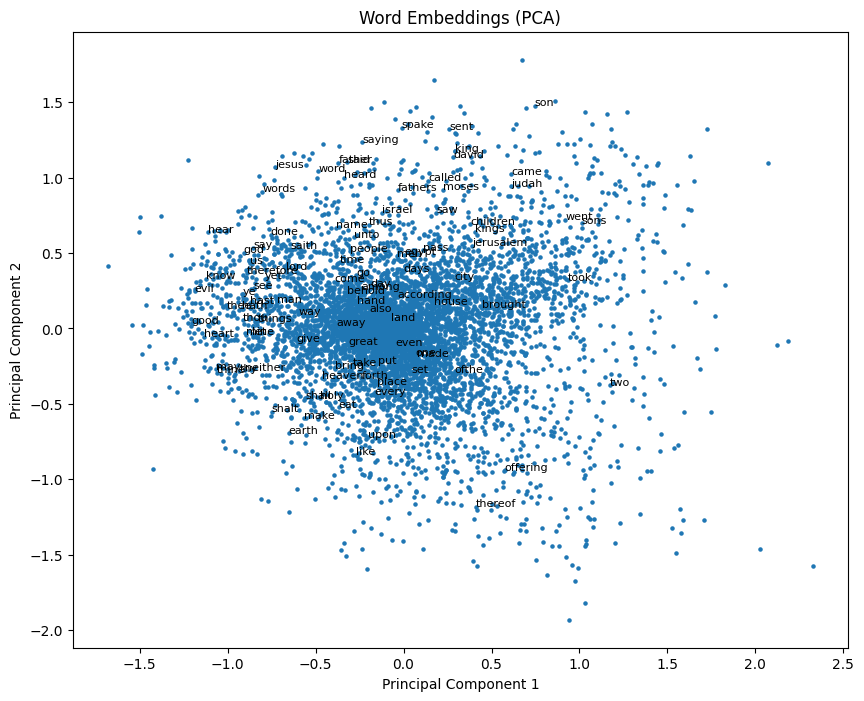

In [36]:
# prompt: 100차원의 단어를 주성분분석 2차원으로 차원축소하여 시각화해줘

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(model.wv.vectors)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)

# 단어 레이블 추가 (단어 개수가 많으면 레이블을 모두 표시하지 않을 수 있습니다)
# ✅ Change: Get the first 1000 words from the index_to_key list
words = list(model.wv.index_to_key)[:100]
for i, word in enumerate(words):
    plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.title('Word Embeddings (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [37]:
# prompt: 100차원의 단어를 주성분분석 3차원으로 차원축소하여 plotly 로 시각화해줘

import plotly.graph_objs as go
from sklearn.decomposition import PCA

# PCA를 사용하여 3차원으로 차원 축소
pca = PCA(n_components=3)
X_pca = pca.fit_transform(model.wv.vectors)

# Plotly를 사용한 3D 시각화
fig = go.Figure()

# ✅ Change: Get the first 1000 words from the index_to_key list
words = list(model.wv.index_to_key)[:100]
for i, word in enumerate(words):
    fig.add_trace(go.Scatter3d(
        x=[X_pca[i, 0]],
        y=[X_pca[i, 1]],
        z=[X_pca[i, 2]],
        mode='markers+text',
        text=[word],
        textposition="top center",
        marker=dict(size=5)
    ))

fig.update_layout(title='Word Embeddings (PCA 3D)',
                  scene=dict(xaxis_title='Principal Component 1',
                             yaxis_title='Principal Component 2',
                             zaxis_title='Principal Component 3'))

fig.show()


## **[tensorflow projector](https://projector.tensorflow.org/)**
### 시각화를 해보시오 > Load 텝에서 데이터 확인하고 동일한 유형의 데이터를 만들기
- ✅ Word2Vec → TSV 변환 코드 (vector + metadata 파일 만들기)
아래 코드를 실행하면, 1) 벡터.tsv, 2) 메타데이터.tsv 두 파일이 생성되고, 이를 Embedding Projector에 업로드하면 돼.
- 🔄 파일 업로드 순서 (Embedding Projector에서)

>> Step 1에 업로드: vectors.tsv

>> Step 2에 업로드: metadata.tsv

>> "Load" 누르면 시각화 가능

In [38]:
model.wv.index_to_key[:10]

['shall', 'unto', 'lord', 'thou', 'god', 'thy', 'said', 'ye', 'thee', 'upon']

In [39]:
len(model.wv.index_to_key)  # 전체 단어 개 수

6196

In [40]:
# 모델에서 vocab 단어 추출
words = list(model.wv.index_to_key)

# Embedding 벡터 추출
vectors = np.array([model.wv[word] for word in words])

# 1. 벡터 저장 (vectors.tsv)
np.savetxt("vectors.tsv", vectors, delimiter='\t')

# 2. 메타데이터 저장 (metadata.tsv)
# ✅ 수정된 metadata.tsv 생성 코드
with open("metadata.tsv", "w", encoding="utf-8") as f:
    for word in words:
        f.write(f"{word}\n")

In [41]:
print("벡터 수:", len(vectors))
print("메타데이터 수:", len(words))

벡터 수: 6196
메타데이터 수: 6196


In [42]:
from google.colab import files
files.download("vectors.tsv")
files.download("metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>